# **Análisis Predictivo y Descriptivo del Impacto de Factores Demográficos y Económicos en los Niveles de Ingresos en Canadá**

# Paso 1: definición del problema.
## Este proyecto tiene el potencial de ofrecer insights valiosos para diseñar políticas públicas, programas sociales y estrategias individuales para mejorar la movilidad económica
## Objetivos
- Objetivo General:
  Analizar y predecir los factores clave que influyen en los niveles de ingresos y el bienestar 
financiero en Canadá.
- Objetivos Específicos:
  1. Identificar las variables más relevantes que afectan los ingresos mediante técnicas de selección 
de características.
  2. Predecir los ingresos individuales utilizando modelos de Machine Learning supervisado.
  3. Visualizar las desigualdades regionales y por grupo demográfico en el bienestar financiero.

Importación de las librerías necesarias

In [1]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Módulo para interactuar con el sistema operativo de forma sencilla:
import os

#
from sklearn.model_selection import train_test_split

#
from sklearn.linear_model import LinearRegression

#
from sklearn.metrics import r2_score, mean_absolute_error




# Paso 2. Lectura de datos.


In [2]:
# Importamos el dataset público.

import kagglehub

path = kagglehub.dataset_download("aradhanahirapara/income-survey-finance-analysis")

print("Path to dataset files:", path)

Path to dataset files: /home/vscode/.cache/kagglehub/datasets/aradhanahirapara/income-survey-finance-analysis/versions/1


In [3]:
# Lista los archivos en la ruta

files = os.listdir(path)
print("Archivos en el dataset:", files)


Archivos en el dataset: ['Income Survey Dataset.csv', 'Income_Dataset_Dictionary.docx']


In [4]:
# Cargar el archivo CSV en un DataFrame

dataset_path = os.path.join(path, "Income Survey Dataset.csv")
data = pd.read_csv(dataset_path)
data.head()


,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996


# Paso 3. Exploración y limpieza de datos.
## Paso 3.1 Comprensión de las características.

In [5]:
# Recurrimos al atributo shape para describir la información que contiene:
print (f" El conjunto de datos cuenta con información de {data.shape[0]} voluntarios, con un total de {data.shape[1]} datos característicos de cada uno de ellos.")

 El conjunto de datos cuenta con información de 72643 voluntarios, con un total de 38 datos característicos de cada uno de ellos.


## Paso 3.2 Identificación de valores duplicados y nulos.

In [6]:
# Información sobre las columnas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 non-null  int64  
 16  Year_immigrant     726

- En este punto conocemos que todas las variables son numéricas y por exigencias del proyecto transformaremos una de estas variables ("Province") a categórica.
- También conocemos que no existen valores nulos

In [7]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data.duplicated().sum()} valores duplicados.")

 Hay un total de 0 valores duplicados.


In [9]:
# Resumen estadístico de las columnas numéricas
#print(data.describe())
print(data.income_after_tax.describe())


count    7.264300e+04
mean     1.769371e+07
std      3.811629e+07
min     -1.394500e+05
25%      2.277500e+04
50%      4.333000e+04
75%      8.366000e+04
max      1.000000e+08
Name: income_after_tax, dtype: float64


## Paso 4. Análisis de correlación de variables

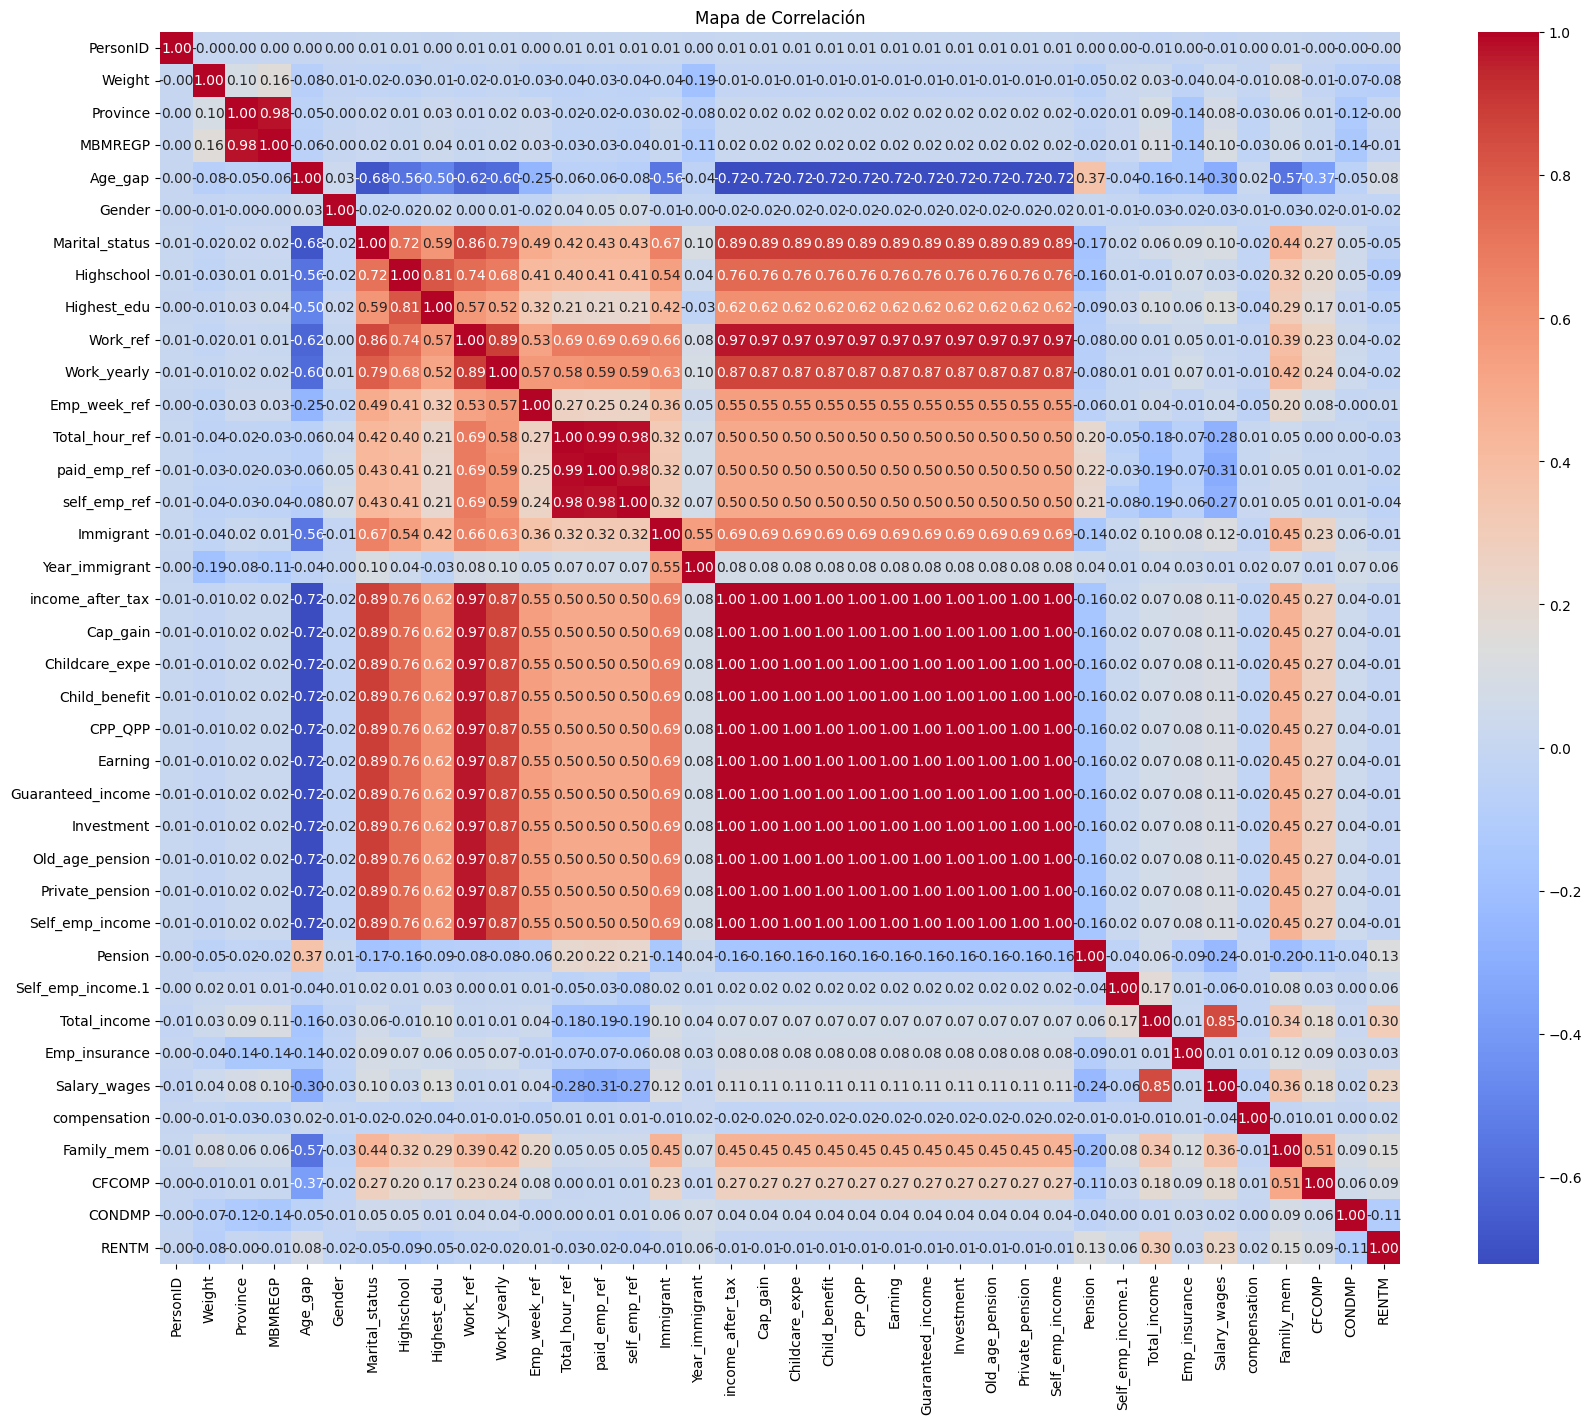

In [10]:
# Nuestra variable target sería "income_after_tax"

# Calculamos las correlaciones
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")#solo dos valores decimales
plt.title("Mapa de Correlación")
plt.show()


## Paso 5. Eliminar variables altamente correlacionadas

Si dos variables tienen una correlación muy alta (por ejemplo, mayor a 0.95), pueden aportar la misma información. Por tanto eliminamos una de ellas.

In [11]:
# Seleccionar un umbral de correlación alta
threshold = 0.95

# Encontrar pares de variables con correlación alta
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
             # Asegurar que no se elimine "income_after_tax"
            if colname != "income_after_tax":
                correlated_features.add(colname)
            

# Eliminar variables redundantes
data.drop(columns=correlated_features, inplace=True)

# Mostrar las variables eliminadas
print("Variables eliminadas:", correlated_features)
# Mostrar las columnas restantes
print("Variables restantes:", data.columns)


Variables eliminadas: {'self_emp_ref', 'Childcare_expe', 'paid_emp_ref', 'Old_age_pension', 'Cap_gain', 'MBMREGP', 'Private_pension', 'Self_emp_income', 'Child_benefit', 'Earning', 'Guaranteed_income', 'Investment', 'CPP_QPP'}
Variables restantes: Index(['PersonID', 'Weight', 'Province', 'Age_gap', 'Gender', 'Marital_status',
       'Highschool', 'Highest_edu', 'Work_ref', 'Work_yearly', 'Emp_week_ref',
       'Total_hour_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Pension', 'Self_emp_income.1', 'Total_income', 'Emp_insurance',
       'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP', 'CONDMP',
       'RENTM'],
      dtype='object')


## Paso 5.1 Eliminar variables irrelevantes

In [12]:
# Eliminar ID porque no tiene valor predictivo
data.drop(columns=["PersonID"], inplace=True)

print(data.columns)

Index(['Weight', 'Province', 'Age_gap', 'Gender', 'Marital_status',
       'Highschool', 'Highest_edu', 'Work_ref', 'Work_yearly', 'Emp_week_ref',
       'Total_hour_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Pension', 'Self_emp_income.1', 'Total_income', 'Emp_insurance',
       'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP', 'CONDMP',
       'RENTM'],
      dtype='object')


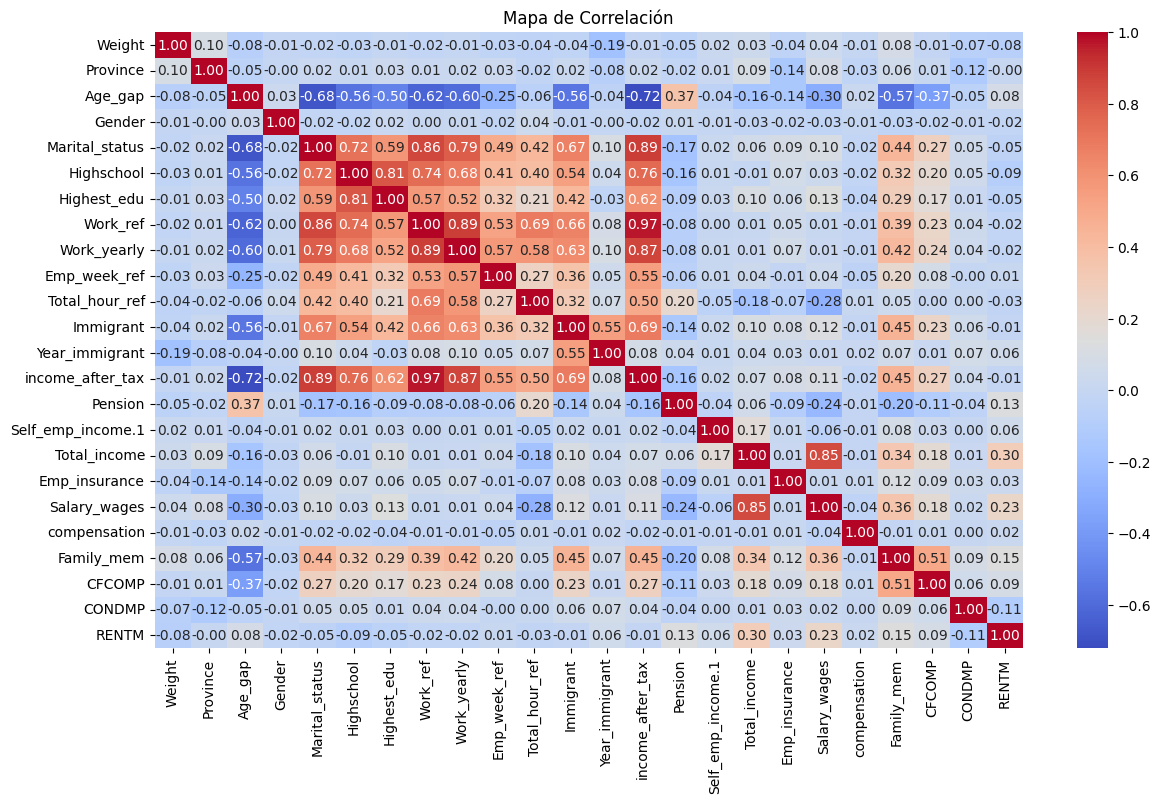

In [13]:
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")#solo dos valores decimales
plt.title("Mapa de Correlación")
plt.show()

# **ANALISIS DETALLADO DE CADA VARIABLE**

In [ ]:
Work_ref  61.729264
1             Age_gap  14.455974
5         Highest_edu  13.794776
13         Family_mem   9.863699
4          Highschool   9.551760
2              Gender   9.373726
14             CFCOMP   8.006429
3      Marital_status   6.902798

In [29]:
desc = data["Work_ref"].describe()
val_c = data["Work_ref"].value_counts()

print(f"Dato de la variable: \n {desc} \n")
print(f"Valores: \n {val_c}")

Dato de la variable: 
 count    72643.000000
mean         2.167284
std          1.826628
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Work_ref, dtype: float64 

Valores: 
 Work_ref
1    39160
2    20655
6    12828
Name: count, dtype: int64


/tmp/ipykernel_22928/3333781934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Work_ref', data=data, palette='pastel', ax=axes[0])
/tmp/ipykernel_22928/3333781934.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Empleado', 'Desempleado', 'Retirado'])
/tmp/ipykernel_22928/3333781934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data['Work_ref'], palette='pastel', ax=axes[1])


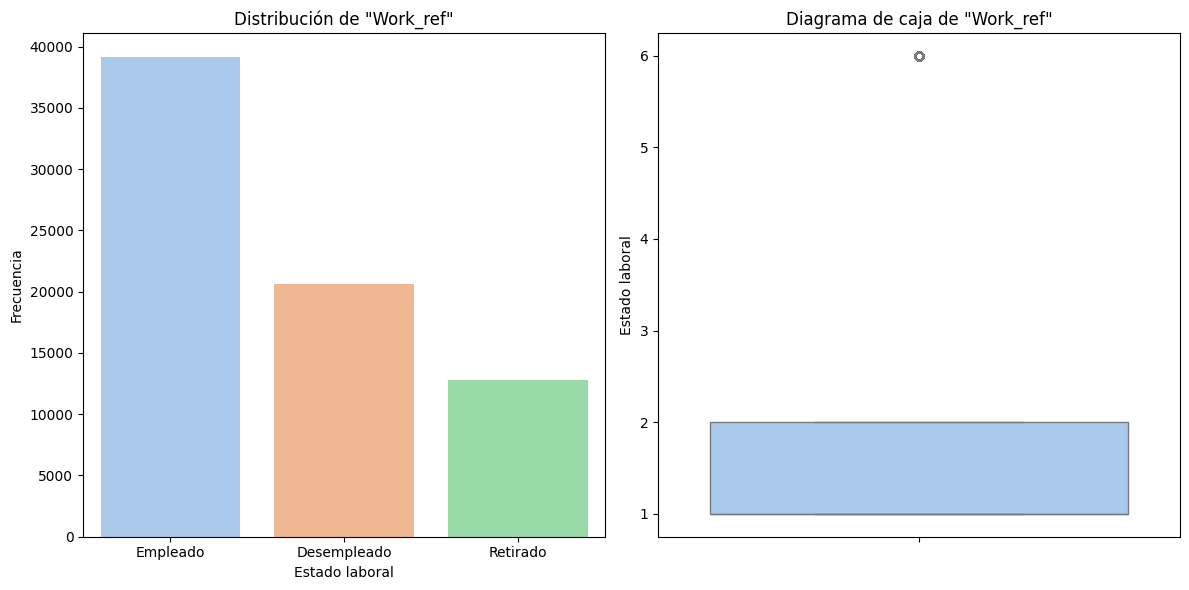

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas y tamaño ajustado

# Primer gráfico: Distribución de Work_ref
sns.countplot(x='Work_ref', data=data, palette='pastel', ax=axes[0])
axes[0].set_title('Distribución de "Work_ref"')
axes[0].set_xlabel('Estado laboral')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['Empleado', 'Desempleado', 'Retirado'])

# Segundo gráfico: Diagrama de caja
sns.boxplot(data=data['Work_ref'], palette='pastel', ax=axes[1])
axes[1].set_title('Diagrama de caja de "Work_ref"')
axes[1].set_ylabel('Estado laboral')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [30]:
desc = data["Age_gap"].describe()
val_c = data["Age_gap"].value_counts()

print(f"Dato de la variable: \n {desc} \n")
print(f"Valores: \n {val_c}")

Dato de la variable: 
 count    72643.000000
mean         9.038201
std          4.499854
min          1.000000
25%          5.000000
50%         10.000000
75%         13.000000
max         15.000000
Name: Age_gap, dtype: float64 

Valores: 
 Age_gap
15    10219
13     5889
12     5793
14     5289
11     4912
3      4909
5      4643
8      4560
1      4520
9      4430
10     4416
7      4358
6      3813
2      3399
4      1493
Name: count, dtype: int64


/tmp/ipykernel_22928/748535649.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_gap', data=data, palette='pastel', ax=axes[0])
/tmp/ipykernel_22928/748535649.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data['Age_gap'], palette='pastel', ax=axes[1])


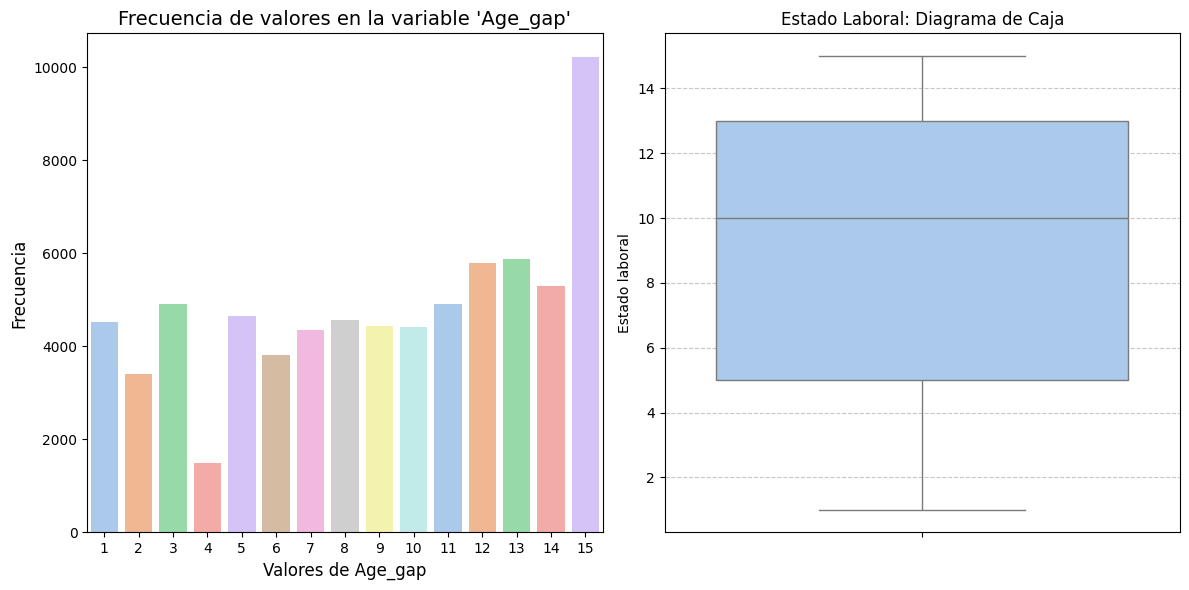

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas y tamaño ajustado

# Primer gráfico: Distribución de Age_gap
sns.countplot(x='Age_gap', data=data, palette='pastel', ax=axes[0])
axes[0].set_title("Frecuencia de valores en la variable 'Age_gap'", fontsize=14)
axes[0].set_xlabel("Valores de Age_gap", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Segundo gráfico: Diagrama de caja
sns.boxplot(data=data['Age_gap'], palette='pastel', ax=axes[1])
axes[1].set_title('Estado Laboral: Diagrama de Caja')
axes[1].set_ylabel('Estado laboral')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [36]:
desc = data["income_after_tax"].describe()
val_c = data["income_after_tax"].value_counts()

print(f"Dato de la variable: \n {desc} \n")
print(f"Valores: \n {val_c}")

Dato de la variable: 
 count    7.264300e+04
mean     1.769371e+07
std      3.811629e+07
min     -1.394500e+05
25%      2.277500e+04
50%      4.333000e+04
75%      8.366000e+04
max      1.000000e+08
Name: income_after_tax, dtype: float64 

Valores: 
 income_after_tax
99999996    12828
0            1043
5000           76
12500          60
8750           57
            ...  
17285           1
5160            1
133270          1
94060           1
182720          1
Name: count, Length: 17711, dtype: int64


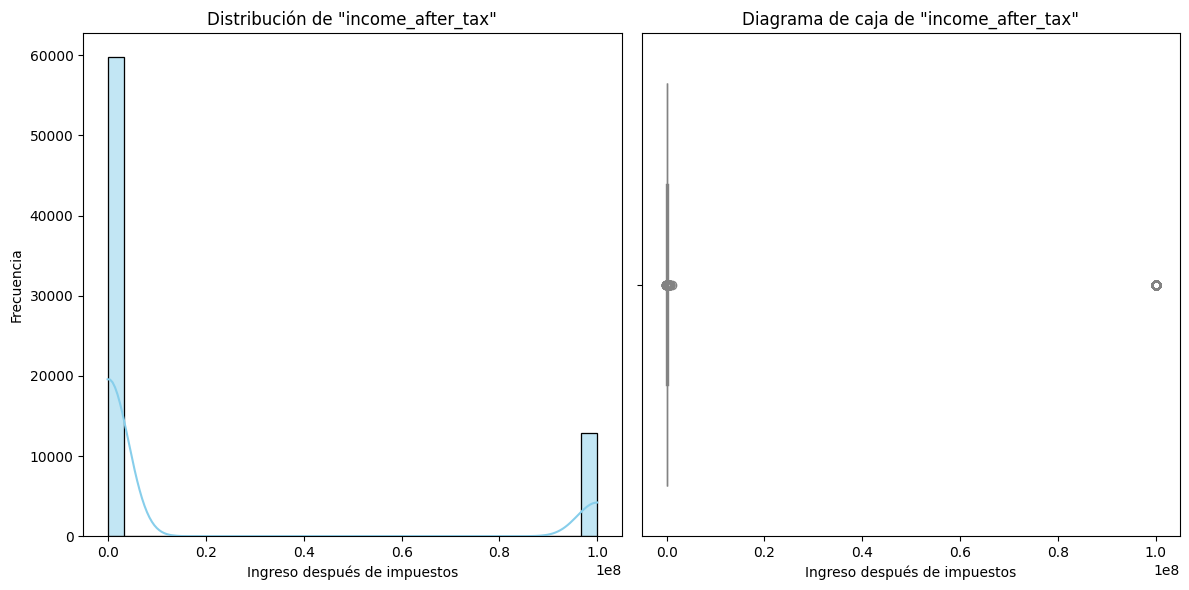

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas y tamaño ajustado

# Primer gráfico: Distribución de income_after_tax
sns.histplot(data['income_after_tax'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de "income_after_tax"')
axes[0].set_xlabel('Ingreso después de impuestos')
axes[0].set_ylabel('Frecuencia')

# Segundo gráfico: Diagrama de caja de income_after_tax
sns.boxplot(x=data['income_after_tax'], color='lightpink', ax=axes[1])
axes[1].set_title('Diagrama de caja de "income_after_tax"')
axes[1].set_xlabel('Ingreso después de impuestos')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


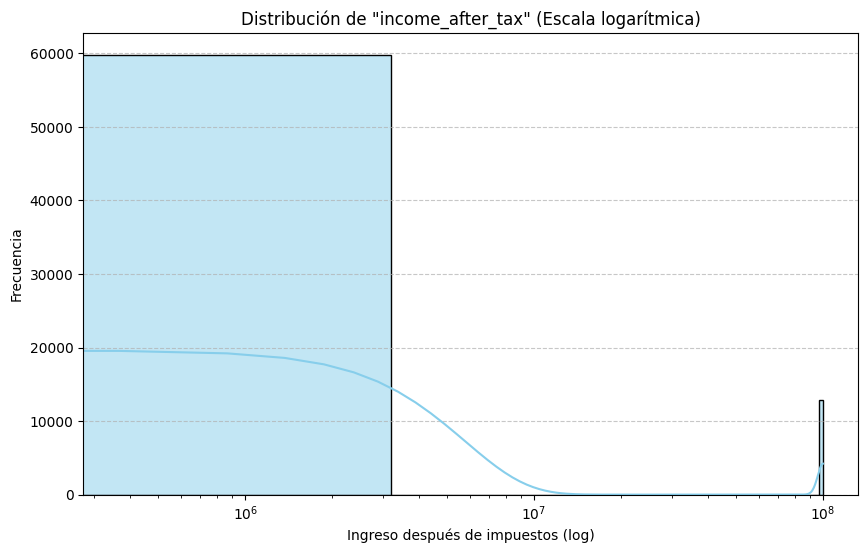

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data['income_after_tax'], bins=30, kde=True, color='skyblue')
plt.xscale('log')
plt.title('Distribución de "income_after_tax" (Escala logarítmica)')
plt.xlabel('Ingreso después de impuestos (log)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [54]:
# Contar el número de outliers (valores mayores o iguales a 15 millón)
num_outliers = data[data['income_after_tax'] >= 99000000].shape[0]

print(f"Número de outliers: {num_outliers}")


Número de outliers: 12828


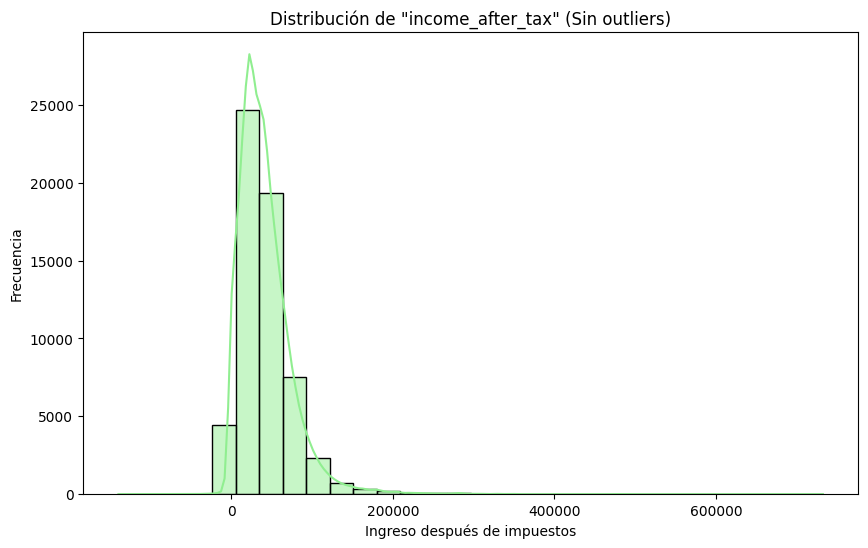

In [39]:
filtered_data = data[data['income_after_tax'] < 1000000]  # Filtrar ingresos menores a 1 millón

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['income_after_tax'], bins=30, kde=True, color='lightgreen')
plt.title('Distribución de "income_after_tax" (Sin outliers)')
plt.xlabel('Ingreso después de impuestos')
plt.ylabel('Frecuencia')
plt.show()


/tmp/ipykernel_22928/2990404410.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income_group', data=data, palette='pastel')


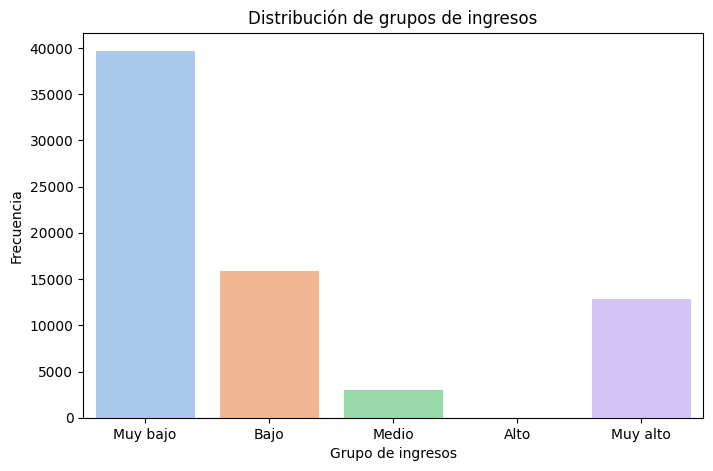

In [40]:
bins = [0, 50000, 100000, 500000, 1000000, data['income_after_tax'].max()]
labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
data['income_group'] = pd.cut(data['income_after_tax'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.countplot(x='income_group', data=data, palette='pastel')
plt.title('Distribución de grupos de ingresos')
plt.xlabel('Grupo de ingresos')
plt.ylabel('Frecuencia')
plt.show()


## A TENER EN CUENTA:
- CAD: Dolar Canadiense
- Ingresos medio/anual: 60.000 - 70.000 
- Ingresos altos: 100.000 - 200.000
- El 1% se encuentra con ingresos muy altos: por encima de 250.000 CAD anual

In [14]:

# Separar variables predictoras y target
X = data.drop(columns=["income_after_tax"])
y = data["income_after_tax"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("R²:", r2_score(y_test, y_pred))
print("Error Absoluto Medio:", mean_absolute_error(y_test, y_pred))


R²: 0.9985995034413597
Error Absoluto Medio: 1005850.7419716535


- R² = 0.9986: Indica que el modelo explica el 99.86% de la variabilidad en la variable objetivo ("income_after_tax"). Esto parece demasiado bueno, lo que sugiere posible sobreajuste (overfitting).

- Error Absoluto Medio (MAE) ≈ 1,005,850: El error promedio de predicción es muy alto, lo cual indica que aunque el modelo tiene un R² alto, las predicciones pueden no ser precisas en términos absolutos.

# (Sobreajuste)

Si el R² es demasiado cercano a 1, es posible que el modelo esté ajustando demasiado a los datos de entrenamiento y no generalice bien.

Esto puede deberse a que hay demasiadas variables correlacionadas o irrelevantes.

# Outliers (Valores Extremos)

Si hay valores extremos en los ingresos, pueden estar distorsionando el modelo y afectando el error.

/tmp/ipykernel_837/1358070126.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['income_after_tax'], shade=True)


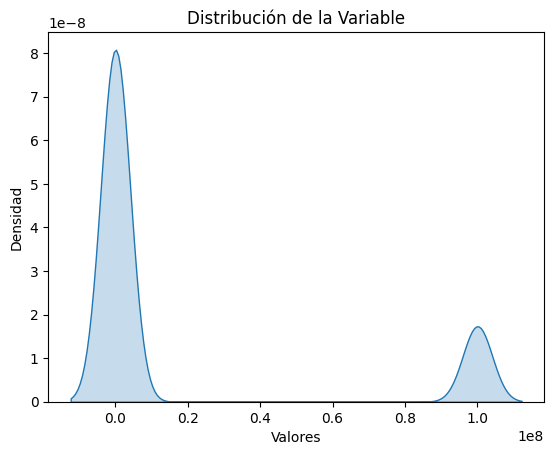

In [15]:
#Distribución de variable target
sns.kdeplot(data['income_after_tax'], shade=True)
plt.title('Distribución de la Variable')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

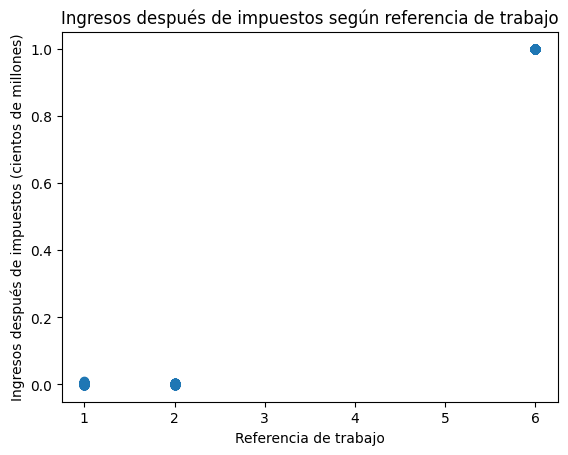

In [16]:
plt.scatter(data['Work_ref'], data['income_after_tax'] / 1e8)
plt.title('Ingresos después de impuestos según referencia de trabajo')
plt.xlabel('Referencia de trabajo')
plt.ylabel('Ingresos después de impuestos (cientos de millones)')
plt.show()



## Paso 4 Análisis de Variables Categóricas y Numéricas

# AQUI LA DUDA ES SI COMENZAR A ELIMINAR VARIABLES YA O REALIZAR PRIMERO UN ANÁLISIS

In [34]:
# Separar columnas numéricas y categóricas
num_cols = data.select_dtypes(include=["number"]).columns
cat_cols = data.select_dtypes(exclude=["number"]).columns

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: Index(['Weight', 'Province', 'Age_gap', 'Gender', 'Marital_status',
       'Highschool', 'Highest_edu', 'Work_ref', 'Work_yearly', 'Emp_week_ref',
       'Total_hour_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Pension', 'Self_emp_income.1', 'Total_income', 'Emp_insurance',
       'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP', 'CONDMP',
       'RENTM'],
      dtype='object')
Variables categóricas: Index([], dtype='object')


In [35]:
# Ver distribución de categorías en cada variable categórica
for col in cat_cols:
    print(f"\nDistribución de {col}:")
    print(data[col].value_counts(normalize=True) * 100)  # En porcentaje

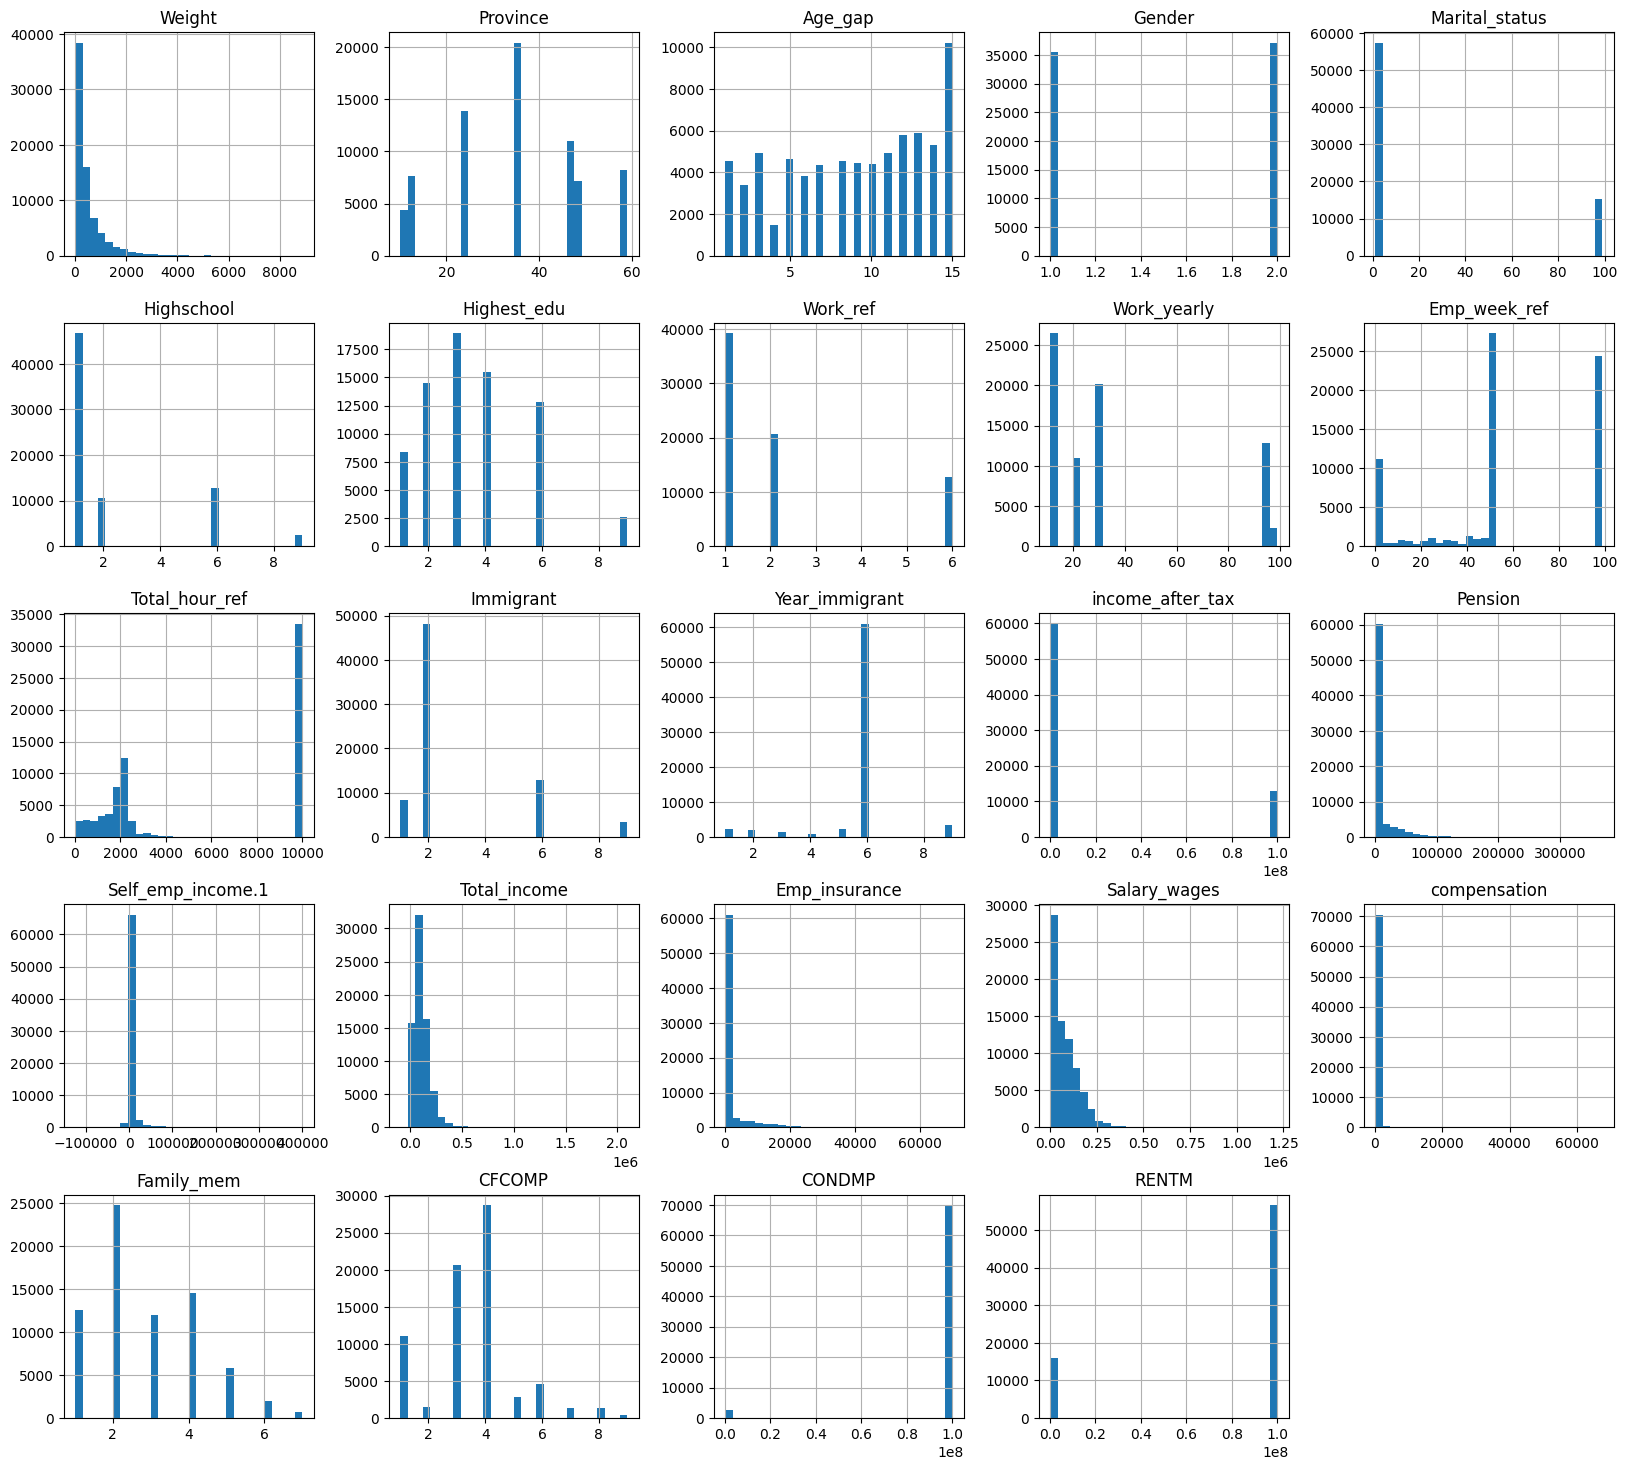

In [36]:
# Histograma de variables numéricas
data[num_cols].hist(figsize=(20, 18), bins=30)
plt.show()

In [37]:
# Visualizar los nombres de las columnas
print(data.columns)

Index(['Weight', 'Province', 'Age_gap', 'Gender', 'Marital_status',
       'Highschool', 'Highest_edu', 'Work_ref', 'Work_yearly', 'Emp_week_ref',
       'Total_hour_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Pension', 'Self_emp_income.1', 'Total_income', 'Emp_insurance',
       'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP', 'CONDMP',
       'RENTM'],
      dtype='object')


Variables candidatas a eliminar

PersonID: Es un identificador, no aporta información relevante.

Self_emp_income.1: Duplicado??

Weight:  No creo que sea relevante para el análisis.

Year_immigrant: Valorar si dejar solo la variable "Inmigrant"

Work_ref y Work_yearly: no sé si están muy correlacionadas

Emp_week_ref y Total_hour_ref: Creo que con una de ellas sería suficiente.

Total_income → Al ser la suma de otras podría generar fugas de información (data leakage).
* Data leakage ocurre cuando en el proceso de entrenamiento de un modelo se incluyen variables o información que no estarían disponibles en un escenario real de predicción. Esto puede llevar a que el modelo tenga un rendimiento artificialmente alto en entrenamiento, pero que falle al aplicarse a nuevos datos.
* En nuestro caso si quisieramos predecir "income_after_tax", incluir "Total_income" (que es la suma de varios componentes de ingresos) sería un error. El modelo simplemente aprendería a "hacer la suma" en lugar de identificar los factores que influyen en el ingreso

CFCOMP, CONDMP, RENTM: Revisar en profundidad utilidad de cada una de ellas.

## Paso 5. Análisis de outlaiers 

In [38]:
# Boxplot para detectar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['MBMREGP'])
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.show()


KeyError: 'MBMREGP'

<Figure size 800x600 with 0 Axes>